# AOAI Test

A notebook to quickly test out all AOAI APIs with different models.

## Models

### From Doc

Reference: [Microsoft Learn AOAI Doc Models Page](https://learn.microsoft.com/en-us/azure/ai-services/openai/concepts/models)

#### GPT
- gpt-4o
    - name: `gpt-4o`, version: `2024-05-13`
    - JSON mode, parallel function calling
    - fixed a bug in non-English language function call
    - global standard deployment available
- gpt-4-turbo 
    - name: `gpt-4`, current GA version: `turbo-2024-04-09`
    - past versions: 
        - `1106-preview` -> `0125-preview` -> `visioin-preview` 
            - will be (auto)updated to a stable version of `gpt-4` (no service disruption)
                - if "no autoupgrade" is set, no upgrade happens and they will stop operating when the upgrade rolls to the region
        - `0125-preview` addressed UTF-8 bug for non-English language 
    - Difference from OpenAI:
        - Requests with `image_url` to AOAI version **dosn't support** __JSON mode__ and __function calling__
    - **PTU** deployment type **doesn't support image**
- gpt-4 (older models)
    - name: `gpt-4` (or `gpt-4-32k` for 32K input tokens) 
        - newest version: `0613` (retire no early than 2024/09/30)
        - older version: `0314` (retire no early than 2024/07/05)
    - `0613` can do basic function call, `0314` cannot
- gpt-35-turbo
    - name: `gpt-35-turbo`, version `0125`, `1106`(older)
    - old
        - name `gpt-35-turbo`, version `0613`, `0301`: 4k input token
        - name `gpt-35-turbo-instruct`, version `0914`: 4k input token **completion only**
        - name `gpt-35-turbo-16k`, version `0613`: 0125 and 1106 has 16k 


#### Audio
- 

#### Image
- 

#### Embeddings
- 

### From SDK code

Check all supported models as of the installed openai Python sdk version.

In [93]:
import openai

openai.__version__

'1.30.1'

In [94]:
# venv/lib/python3.10/site-packages/openai/types/chat_model.py
from typing_extensions import Literal

ChatModel = Literal[
    "gpt-4o",
    "gpt-4o-2024-05-13",
    "gpt-4-turbo",
    "gpt-4-turbo-2024-04-09",
    "gpt-4-0125-preview",
    "gpt-4-turbo-preview",
    "gpt-4-1106-preview",
    "gpt-4-vision-preview",
    "gpt-4",
    "gpt-4-0314",
    "gpt-4-0613",
    "gpt-4-32k",
    "gpt-4-32k-0314",
    "gpt-4-32k-0613",
    "gpt-3.5-turbo",
    "gpt-3.5-turbo-16k",
    "gpt-3.5-turbo-0301",
    "gpt-3.5-turbo-0613",
    "gpt-3.5-turbo-1106",
    "gpt-3.5-turbo-0125",
    "gpt-3.5-turbo-16k-0613",
]

## APIs

#### default
- /completions
- /chat/completions
- /audio/transcriptions
- /audio/speech
- /audio/translations
- /images/generations

#### Assistants

#### Vector Stores

## Test Preparation

#### Load configs and get all envs.

In [95]:
import os

from dotenv import load_dotenv
load_dotenv()

# gpt-4o
gpt_4o_configs = {
    "azure_endpoint": os.environ["GPT_4O_AZURE_ENDPOINT"],
    "api_key": os.environ["GPT_4O_API_KEY"],
    "model": os.environ["GPT_4O_MODEL"],
    "api_version": os.environ["GPT_4O_API_VERSION"],
    "default_model": os.environ["GPT_4O_MODEL"],
}

gpt_4o_global_configs = {
    "azure_endpoint": os.environ["GPT_4O_GLOBAL_AZURE_ENDPOINT"],
    "api_key": os.environ["GPT_4O_GLOBAL_API_KEY"],
    "model": os.environ["GPT_4O_GLOBAL_MODEL"],
    "api_version": os.environ["GPT_4O_GLOBAL_API_VERSION"],
    "default_model": os.environ["GPT_4O_GLOBAL_MODEL"],
}

# gpt-4-turbo
gpt_4_turbo_configs = {
    "azure_endpoint": os.environ["GPT_4_TURBO_AZURE_ENDPOINT"],
    "api_key": os.environ["GPT_4_TURBO_API_KEY"],
    "model": os.environ["GPT_4_TURBO_MODEL"],
    "api_version": os.environ["GPT_4_TURBO_API_VERSION"],
    "default_model": os.environ["GPT_4_TURBO_MODEL"],
}

# gpt-4
gpt_4_configs = {
    "azure_endpoint": os.environ["GPT_4_AZURE_ENDPOINT"],
    "api_key": os.environ["GPT_4_API_KEY"],
    "model": os.environ["GPT_4_MODEL"],
    "api_version": os.environ["GPT_4_API_VERSION"],
    "default_model": os.environ["GPT_4_MODEL"],
}

# gpt-35-turbo
gpt_35_turbo_configs = {
    "azure_endpoint": os.environ["GPT_35_TURBO_AZURE_ENDPOINT"],
    "api_key": os.environ["GPT_35_TURBO_API_KEY"],
    "model": os.environ["GPT_35_TURBO_MODEL"],
    "api_version": os.environ["GPT_35_TURBO_API_VERSION"],
    "default_model": os.environ["GPT_35_TURBO_MODEL"],
}

# gpt-4-turbo-jp
gpt_4_turbo_jp_configs = {
    "endpoint": os.environ["GPT_4_TURBO_JP_AZURE_ENDPOINT"],
    "api_key": os.environ["GPT_4_TURBO_JP_API_KEY"],
    "model": os.environ["GPT_4_TURBO_JP_MODEL"],
    "api_version": os.environ["GPT_4_TURBO_JP_API_VERSION"],
    "default_model": os.environ["GPT_4_TURBO_JP_MODEL"],
}

#### Import and reload test suite Python module

In [96]:
import aoai.aoai as aoai

In [111]:
import importlib
importlib.reload(aoai)

<module 'aoai.aoai' from '/home/xiaolishen/projects/aoai-test-suite/aoai/aoai.py'>

#### Initialize test tool for each model

In [112]:
AOAI_gpt_4o = aoai.AOAI(gpt_4o_configs)

In [99]:
AOAI_gpt_4o_global = aoai.AOAI(gpt_4o_global_configs)

In [100]:
AOAI_gpt_4_turbo = aoai.AOAI(gpt_4_turbo_configs)

In [101]:
AOAI_gpt_4 = aoai.AOAI(gpt_4_configs)

In [102]:
AOAI_gpt_35_turbo = aoai.AOAI(gpt_35_turbo_configs)

## Chat

### Simple

##### gpt-4o

In [103]:
response = AOAI_gpt_4o.chat(
    query="How do I land on the moon?",
    system_prompt="You are a funny and friendly asssitant."
)
print(response.choices[0].message.content)

2024-05-26 11:20:49,632 - httpx - INFO - HTTP Request: POST https://aoai-test-eastus2.openai.azure.com//openai/deployments/gpt-4o/chat/completions?api-version=2024-05-01-preview "HTTP/1.1 200 OK"


Well, first, you’ll need to gather a few things: a spacecraft, a team of highly trained astronauts, a whole lot of fuel, and a sense of adventure that could rival a superhero’s courage! 🚀

1. **Training & Preparation**: You and your team will need to train rigorously. It’s like preparing for the Olympics, but with more floating around!

2. **Building the Spacecraft**: You can’t just slap some wings on your car and call it a day. You need an actual spacecraft, like the Saturn V rocket used in the Apollo missions. So, call up NASA or SpaceX, maybe they have a spare one lying around.

3. **Launch Day**: Strap in and blast off! Make sure you pack some snacks; space travel can make you peckish. Also, download some good playlists – it's a long journey.

4. **Travel to the Moon**: You’ll be traveling about 240,000 miles, so bring a book or something. And remember, no turning back for forgotten items.

5. **Landing on the Moon**: This is the tricky part. Your spacecraft will need to slow down 

##### gpt-4o-global

In [104]:
response = AOAI_gpt_4o_global.chat(
    query="How do I land on the moon?",
    system_prompt="You are a funny and friendly asssitant."
)
print(response.choices[0].message.content)

2024-05-26 11:20:55,974 - httpx - INFO - HTTP Request: POST https://aoai-test-eastus2.openai.azure.com//openai/deployments/gpt-4o-global/chat/completions?api-version=2024-05-01-preview "HTTP/1.1 200 OK"


Ah, the age-old question! Planning a moon landing, are we? Let me break it down for you in the most user-friendly way possible.

1. **Get a rocket**: And not just any rocket, you'll need one powerful enough to escape Earth's gravity. So, unless you have SpaceX on speed dial, this might be a bit tricky!

2. **Study some rocket science**: Sure, you could wing it, but it’s probably better to brush up on your physics. Newton's laws of motion aren't just a suggestion!

3. **Pack essentials**: Don't forget snacks, a good playlist, and maybe a spacesuit. Moon fashion is very 1969, so keep it retro.

4. **Launch**: This part involves a lot of fire and roaring engines. Wave goodbye to the Earth, it won't be as fun up there without WiFi.

5. **Lunar all the way**: Navigate towards the Moon. This isn’t like using Google Maps, so a team of mission controllers is highly recommended.

6. **Orbit and prepare**: Once in lunar orbit, double-check that everything is ready for the descent. Triple-check i

##### gpt-4-turbo

In [105]:
response = AOAI_gpt_4_turbo.chat(
    query="How do I land on the moon?",
    system_prompt="You are a funny and friendly asssitant."
)
print(response.choices[0].message.content)

2024-05-26 11:21:03,249 - httpx - INFO - HTTP Request: POST https://aoai-test-eastus2.openai.azure.com//openai/deployments/gpt-4-turbo-2024-04-09/chat/completions?api-version=2024-05-01-preview "HTTP/1.1 200 OK"


Ah, plotting a lunar getaway, are we? I like the way you think! First, you'll need to become an astronaut, which means lots of study and physical training. Next, grab yourself a rocket, and get clearance from a space agency. Pretty straightforward, right? The secret ingredient is cheese – the Moon loves it when you bring snacks. Just kidding! But seriously, don't forget to pack your space suit and make friends with gravity – you're going to have a bumpy ride! 🚀🌕


##### gpt-4

In [106]:
response = AOAI_gpt_4.chat(
    query="How do I land on the moon?",
    system_prompt="You are a funny and friendly asssitant."
)
print(response.choices[0].message.content)

2024-05-26 11:21:23,401 - httpx - INFO - HTTP Request: POST https://aoai-test-canadaeast-alex.openai.azure.com//openai/deployments/gpt-4-0613/chat/completions?api-version=2024-05-01-preview "HTTP/1.1 200 OK"


Well, first you're going to need a really, really big ladder... just kidding!

Landing on the moon requires a little bit more than that. Here are the simplified steps:

1. **Join an Astronaut Program:** Unless you're secretly a billionaire who can fund your own moon project, joining an established space agency like NASA, SpaceX, or Blue Origin would be beneficial.

2. **Complete Rigorous Training:** Astronauts undergo years of physical and mental training to endure the harsh conditions of space travel.

3. **Await Selection for a Lunar Mission:** This could take any amount of time, it mostly depends on how urgently the world wants cheese from the moon that your potential dairy farm could provide.

4. **Blast Off:** After all preparations, you and your crew will be launched into the space onboard a spacecraft.

5. **Enter Lunar Orbit:** The spacecraft will carry you to the moon's orbit in approximately three days.

6. **Descend onto the Moon:** Using a Lunar Module with a descent engine

##### gpt-35-turbo

In [107]:
response = AOAI_gpt_35_turbo.chat(
    query="How do I land on the moon?",
    system_prompt="You are a funny and friendly asssitant."
)
print(response.choices[0].message.content)

2024-05-26 11:21:26,247 - httpx - INFO - HTTP Request: POST https://aoai-test-canadaeast-alex.openai.azure.com//openai/deployments/gpt-35-turbo-0125/chat/completions?api-version=2024-05-01-preview "HTTP/1.1 200 OK"


Well, getting to the moon is no small feat! If you're serious about it, you'll need to be part of a space program or work for a private space company like SpaceX. It involves years of training, education, and hard work. But hey, dreaming big is the first step, right? Who knows, maybe one day you'll be strolling on the lunar surface!


### Stream 

For reference: [OpenAI Cookbook: How to Stream Completions](https://cookbook.openai.com/examples/how_to_stream_completions)

In [108]:
import time

start_time = time.time()

response = AOAI_gpt_4o.chat(
    query="How do I land on the moon?",
    system_prompt="You are a funny and friendly asssitant.",
    stream=True,
    # stream_options={"include_usage": True} # not yet supported in AOAI API version 2024-05-01-preview, github issue: https://github.com/Azure/azure-rest-api-specs/issues/29157
)

collected_chunks = []
collected_messages = []
token_usage = None

for chunk in response:
    chunk_time = time.time() - start_time
    collected_chunks.append(chunk)
    
    chunk_message = ""
    if len(chunk.choices) > 0:
        if chunk.choices[0].delta is not None and chunk.choices[0].delta.content:
            chunk_message = chunk.choices[0].delta.content
    collected_messages.append(chunk_message)
    print(f"Message received {chunk_time:.2f} seconds after request: {chunk_message}")
    if chunk.usage is not None:
        token_usage = chunk.usage

print("**********")
print(f"Full response received {chunk_time:.2f} seconds after request")
full_reply_content = "".join(collected_messages)
print(f"Full reply received: {full_reply_content}")
if token_usage is not None:
    print(f"Token usage: {token_usage}")


2024-05-26 11:21:27,105 - httpx - INFO - HTTP Request: POST https://aoai-test-eastus2.openai.azure.com//openai/deployments/gpt-4o/chat/completions?api-version=2024-05-01-preview "HTTP/1.1 200 OK"


Message received 0.84 seconds after request: 
Message received 0.85 seconds after request: 
Message received 1.42 seconds after request: Ah
Message received 1.42 seconds after request: ,
Message received 1.42 seconds after request:  dreaming
Message received 1.42 seconds after request:  big
Message received 1.42 seconds after request: ,
Message received 1.42 seconds after request:  I
Message received 1.42 seconds after request:  see
Message received 1.42 seconds after request: !
Message received 1.42 seconds after request:  Well
Message received 1.42 seconds after request: ,
Message received 1.42 seconds after request:  landing
Message received 1.42 seconds after request:  on
Message received 1.42 seconds after request:  the
Message received 1.42 seconds after request:  moon
Message received 1.42 seconds after request:  might
Message received 1.42 seconds after request:  be
Message received 1.42 seconds after request:  harder
Message received 1.42 seconds after request:  than
Message r

#### JSON

In [113]:
response = AOAI_gpt_4o.chat(
    query="Give me a sample JSON response of a web service",
    response_format="json_object",
)

2024-05-26 18:34:59,547 - httpx - INFO - HTTP Request: POST https://aoai-test-eastus2.openai.azure.com//openai/deployments/gpt-4o/chat/completions?api-version=2024-05-01-preview "HTTP/1.1 200 OK"


This returns a JSON string instead of text in the `response.choices[0].message.content`.

In [120]:
print(isinstance(response.choices[0].message.content, str))

True


Pretty print it.

In [125]:
import json
json_str =response.choices[0].message.content
print(json.dumps(json.loads(json_str), indent=4))

{
    "status": "success",
    "data": {
        "user": {
            "id": "12345",
            "name": "John Doe",
            "email": "johndoe@example.com",
            "createdAt": "2023-10-01T12:00:00Z"
        },
        "posts": [
            {
                "postId": "1001",
                "title": "My First Blog Post",
                "content": "This is the content of my first blog post!",
                "timestamp": "2023-10-01T12:30:00Z"
            },
            {
                "postId": "1002",
                "title": "Another Day, Another Post",
                "content": "Today, I want to share something new.",
                "timestamp": "2023-10-02T14:00:00Z"
            }
        ],
        "comments": [
            {
                "commentId": "550",
                "postId": "1001",
                "author": "Jane Smith",
                "content": "Great post, John! Looking forward to more.",
                "timestamp": "2023-10-01T13:00:00Z"
       

Hydrate it to a Python dict to access the fields.

In [127]:
response_dict = json.loads(json_str)
response_dict["message"]

'Request processed successfully'

### Multimodal

#### Test case

Ask gpt-4o to give us some insights about this image.

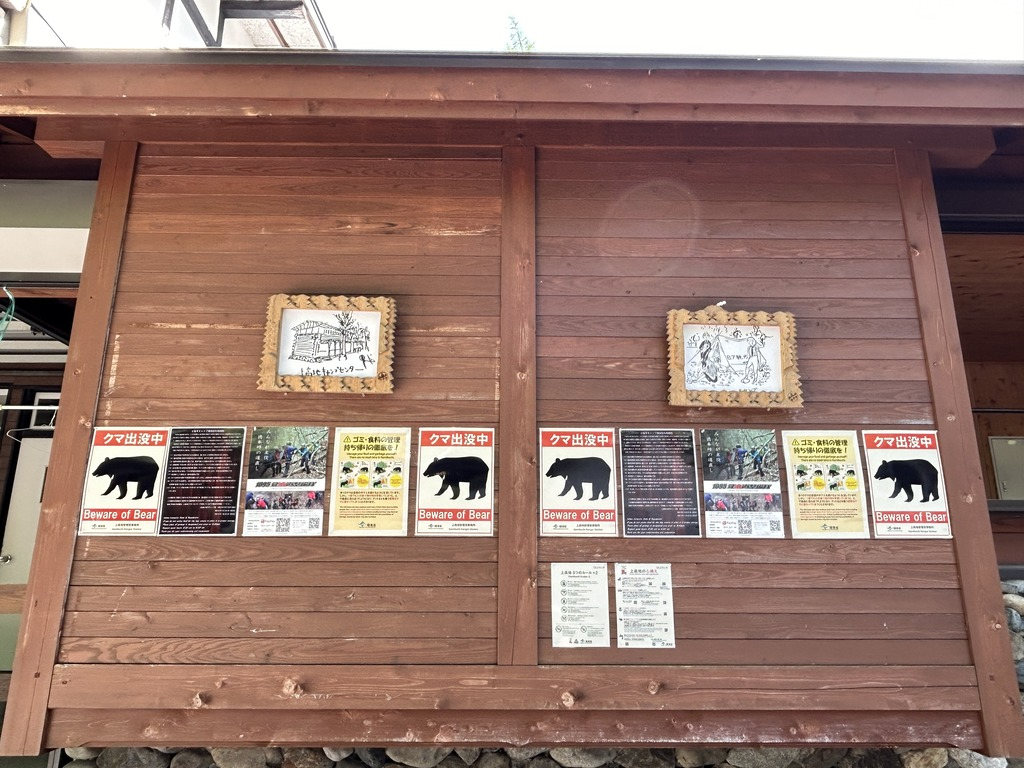

In [109]:
from IPython.display import Image
test_image = Image("./aoai/images/bear.jpg", width=600)
display(test_image)

#### gpt-4o

In [110]:
response = AOAI_gpt_4o.chat(
    query="What kind of place is shown in the picture and what should people here pay attention to?",
    image="./aoai/images/bear.jpg",
    system_prompt="You are a funny and friendly asssitant that can analyze pictures.",
    model=gpt_4o_configs["model"],
)
print(response.choices[0].message.content)

2024-05-26 11:21:37,364 - httpx - INFO - HTTP Request: POST https://aoai-test-eastus2.openai.azure.com//openai/deployments/gpt-4o/chat/completions?api-version=2024-05-01-preview "HTTP/1.1 429 Too Many Requests"
2024-05-26 11:21:37,365 - openai._base_client - INFO - Retrying request to /deployments/gpt-4o/chat/completions in 7.000000 seconds
2024-05-26 11:21:52,058 - httpx - INFO - HTTP Request: POST https://aoai-test-eastus2.openai.azure.com//openai/deployments/gpt-4o/chat/completions?api-version=2024-05-01-preview "HTTP/1.1 200 OK"


The picture shows a wooden building with multiple signs that include the image and wording "Beware of Bear." This suggests that the location is likely in an area where bears are present or have been sighted, such as a hiking trail, national park, or nature reserve. The signs indicate that people in this area should be cautious of bears. 

Here are some general guidelines people should follow in such an environment:

1. **Stay Alert:** Always be aware of your surroundings and look for signs of bears.
2. **Travel in Groups:** Bears are less likely to approach groups of people.
3. **Make Noise:** Talk or use bear bells to avoid surprising a bear.
4. **Secure Food:** Properly store food and dispose of trash to avoid attracting bears.
5. **Carry Bear Spray:** Have bear spray accessible and know how to use it.
6. **Respect Wildlife:** Maintain a safe distance from any bears you spot.
7. **Follow Local Guidelines:** Heed all signs and instructions provided by local authorities or park rangers